<a href="https://colab.research.google.com/github/jai2shan/TSAI-EVA40-Assignments/blob/master/Session%208/Assignment_8_Trial_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install asgnmt8-0.0.0-py3-none-any.whl


Processing ./asgnmt8-0.0.0-py3-none-any.whl


## Updates in this trial

> Changing the learning rate to 0.1

In [2]:
from torchvision import transforms
from asgnmt8.DataLoader import cifar_data_loader,View_images
transform_params = transforms.Compose([transforms.RandomHorizontalFlip(),
                                       transforms.Grayscale(num_output_channels=3), 
                                       transforms.RandomCrop(32, padding=4),  
                                       transforms.RandomRotation(10),  
                                       transforms.RandomAffine(0,shear=10,scale=(0.8,1.2)),  
                                       transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))])

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

trainloader,testloader = cifar_data_loader(transform_params,BatchSize=250)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
import torch

from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

from asgnmt8.resnet import ResNet18
net = ResNet18().to(device)
summary(net, input_size=(3,32,32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [4]:
from asgnmt8.Training_Testing import TrainTest
import torch.optim as optim
import torch.nn as nn

tt = TrainTest()
test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9,weight_decay = 0.00005)
#scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

for epoch in range(30):
    print("EPOCH:", epoch)
    tt.train_(net, device, trainloader, optimizer, criterion, epoch,L1 = False)
#    scheduler.step()
    acc = tt.test_(net, device, testloader)  
    
   
print('Finished Training')

  0%|          | 0/200 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.8566023111343384 Batch_id=199 Accuracy=20.26: 100%|██████████| 200/200 [00:37<00:00,  5.36it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -1.0025, Accuracy: 2957/10000 (29.57%)

EPOCH: 1


Loss=1.5959161520004272 Batch_id=199 Accuracy=36.21: 100%|██████████| 200/200 [00:37<00:00,  5.36it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -1.6927, Accuracy: 3762/10000 (37.62%)

EPOCH: 2


Loss=1.3740994930267334 Batch_id=199 Accuracy=45.06: 100%|██████████| 200/200 [00:37<00:00,  5.39it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -2.3864, Accuracy: 4847/10000 (48.47%)

EPOCH: 3


Loss=1.2834186553955078 Batch_id=199 Accuracy=52.01: 100%|██████████| 200/200 [00:37<00:00,  5.39it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -2.8592, Accuracy: 5221/10000 (52.21%)

EPOCH: 4


Loss=1.1220848560333252 Batch_id=199 Accuracy=56.91: 100%|██████████| 200/200 [00:37<00:00,  5.40it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -3.2050, Accuracy: 5757/10000 (57.57%)

EPOCH: 5


Loss=1.0936638116836548 Batch_id=199 Accuracy=60.35: 100%|██████████| 200/200 [00:36<00:00,  5.41it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -3.3952, Accuracy: 6025/10000 (60.25%)

EPOCH: 6


Loss=0.939224898815155 Batch_id=199 Accuracy=62.77: 100%|██████████| 200/200 [00:37<00:00,  5.37it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -3.7677, Accuracy: 5708/10000 (57.08%)

EPOCH: 7


Loss=0.8990545272827148 Batch_id=199 Accuracy=65.44: 100%|██████████| 200/200 [00:37<00:00,  5.40it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -4.1254, Accuracy: 6648/10000 (66.48%)

EPOCH: 8


Loss=0.7486141920089722 Batch_id=199 Accuracy=67.79: 100%|██████████| 200/200 [00:37<00:00,  5.38it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -4.0593, Accuracy: 6698/10000 (66.98%)

EPOCH: 9


Loss=0.7747527360916138 Batch_id=199 Accuracy=70.04: 100%|██████████| 200/200 [00:37<00:00,  5.37it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -4.5808, Accuracy: 6778/10000 (67.78%)

EPOCH: 10


Loss=0.727943480014801 Batch_id=199 Accuracy=71.79: 100%|██████████| 200/200 [00:37<00:00,  5.38it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -4.9211, Accuracy: 7088/10000 (70.88%)

EPOCH: 11


Loss=0.6889026165008545 Batch_id=199 Accuracy=73.06: 100%|██████████| 200/200 [00:37<00:00,  5.40it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.2719, Accuracy: 7337/10000 (73.37%)

EPOCH: 12


Loss=0.7911942601203918 Batch_id=199 Accuracy=74.89: 100%|██████████| 200/200 [00:36<00:00,  5.41it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -4.9074, Accuracy: 7104/10000 (71.04%)

EPOCH: 13


Loss=0.7241315245628357 Batch_id=199 Accuracy=76.14: 100%|██████████| 200/200 [00:37<00:00,  5.39it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.6330, Accuracy: 7413/10000 (74.13%)

EPOCH: 14


Loss=0.6419440507888794 Batch_id=199 Accuracy=76.94: 100%|██████████| 200/200 [00:37<00:00,  5.38it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.6383, Accuracy: 7508/10000 (75.08%)

EPOCH: 15


Loss=0.7225710153579712 Batch_id=199 Accuracy=77.93: 100%|██████████| 200/200 [00:37<00:00,  5.37it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.1282, Accuracy: 7415/10000 (74.15%)

EPOCH: 16


Loss=0.5409946441650391 Batch_id=199 Accuracy=78.46: 100%|██████████| 200/200 [00:37<00:00,  5.40it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.8845, Accuracy: 7620/10000 (76.20%)

EPOCH: 17


Loss=0.5815015435218811 Batch_id=199 Accuracy=79.24: 100%|██████████| 200/200 [00:37<00:00,  5.40it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.2541, Accuracy: 7601/10000 (76.01%)

EPOCH: 18


Loss=0.6137193441390991 Batch_id=199 Accuracy=80.17: 100%|██████████| 200/200 [00:36<00:00,  5.41it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.6966, Accuracy: 7836/10000 (78.36%)

EPOCH: 19


Loss=0.5468510985374451 Batch_id=199 Accuracy=80.82: 100%|██████████| 200/200 [00:37<00:00,  5.40it/s]



Test set: Average loss: -6.5307, Accuracy: 7807/10000 (78.07%)

Finished Training


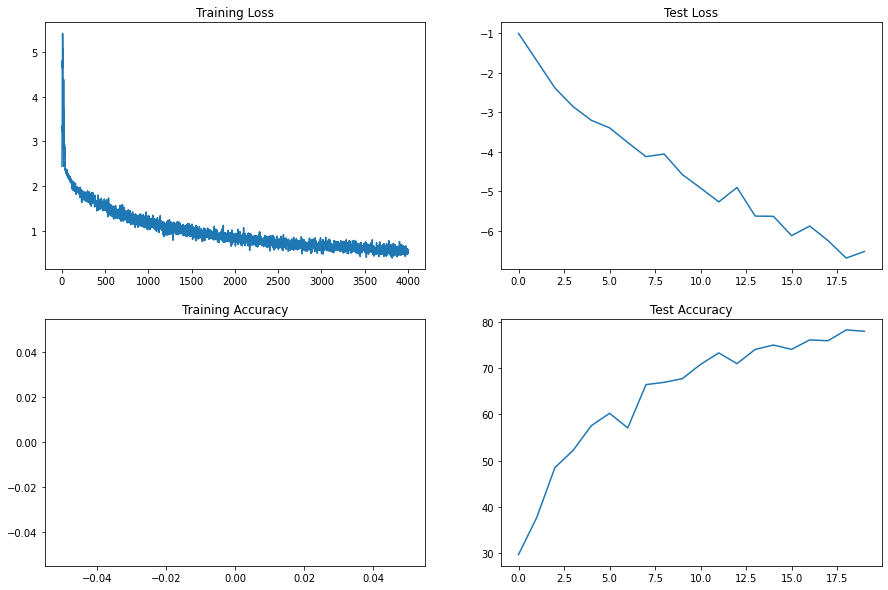

In [5]:
from asgnmt8.ModelPerformance import PlotTrainingGraphs,ViewModelPerformance

PlotTrainingGraphs(tt)

In [6]:
ViewModelPerformance(testloader,model,classes,device)

NameError: ignored